In [1]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris=load_iris()
values=iris.data
pca=PCA(n_components=2)
reduced=pca.fit_transform(values)
print("The Shape of Original Dataset: ",values.shape[1])
print("The Shape of Reduced Dataset:  ",reduced.shape[1]) # Just testing

The Shape of Original Dataset:  4
The Shape of Reduced Dataset:   2


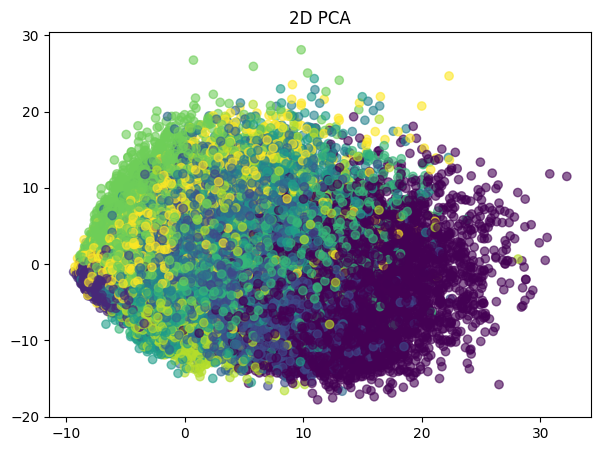

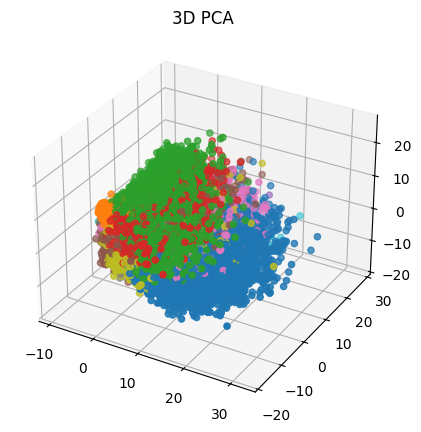

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from mpl_toolkits.mplot3d import Axes3D

(x_train,y_train),(_,_)=mnist.load_data()
x_train_flat=x_train.reshape(-1,28*28)

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_train_flat)

pca_2d=PCA(n_components=2)
x_2d=pca_2d.fit_transform(x_scaled)
plt.figure(figsize=(7,5))
plt.scatter(x_2d[:,0],x_2d[:,1],alpha=0.6,c=y_train)
plt.title("2D PCA")
plt.show()

pca_3d=PCA(n_components=3)
x_3d=pca_3d.fit_transform(x_scaled)
fig=plt.figure(figsize=(7,5))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x_3d[:,0],x_3d[:,1],x_3d[:,2],c=y_train,cmap='tab10')
plt.title("3D PCA")
plt.show()

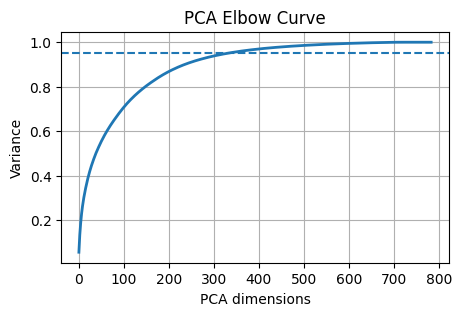

In [3]:
import numpy as np
full_pca=PCA()
full_pca.fit(x_scaled)
cum_explained=np.cumsum(full_pca.explained_variance_ratio_)
plt.figure(figsize=(5,3))
plt.plot(cum_explained,linewidth=2)
plt.axhline(y=0.95,linestyle="--")
plt.title("PCA Elbow Curve")
plt.xlabel("PCA dimensions")
plt.ylabel("Variance")
plt.grid(True)
plt.show()

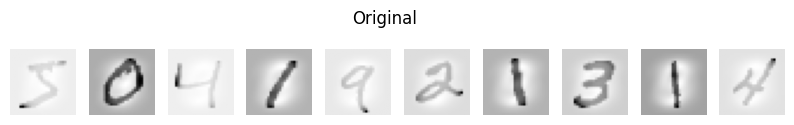

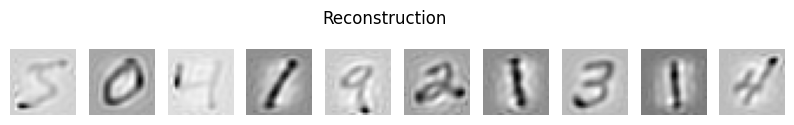

In [ ]:
comps=154
pca_80=PCA(n_components=comps)
a=pca_80.fit_transform(x_scaled)
b=pca_80.inverse_transform(a)
def PCA_graphing(name, data):
    fig,axes=plt.subplots(1,10,figsize=(10,1.5))
    for i,ax in enumerate(axes):
        ax.imshow(data[i].reshape(28,28),cmap='binary')
        ax.axis('off')
    plt.suptitle(name)
    plt.show()
PCA_graphing("Original",x_scaled)
PCA_graphing("Reconstruction",b)